In [ ]:
import gym
from DQN import DQNAgent
import numpy as np
import random
import time
from atari_wrappers import *

In [ ]:
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
Extracting  ROMS/Bank Heist (Unknown) (PAL) [a].bin                        3%  OK 
Extracting  ROMS/Bank Heist (Unknown) (PAL).bin                            3%  OK 
Extracting  ROMS/Barnstorming (1982) (Activision, Steve Cartwright) (AX-013) ~.bin       3%  OK 
Extracting  ROMS/Barnstorming (CCE).bin                                    3%  OK 
Extracting  ROMS/Barnstorming (Unknown) (PAL) [a].bin                      3%  OK 
Extracting  ROMS/Barnstorming (Unknown) (PAL).bin                          3%  OK 
Extracting  ROMS/Barnstorming - Die tollkeuhnen Flieger (1982) (Activision, Steve Cartwright - Ariola) (EAX-013, PAX-013 - 711 013-720) (PAL).bin       3%  OK 
Extracting  ROMS/Base Attack (1983) (Home Vision - Gem International Corporation - VDI) (VCS83113) (PAL) ~.bin       3%  OK 
Extracting  ROMS/Base Attack (Hack) (Unknown).bin                          3

In [ ]:
!python -m atari_py.import_roms .

/usr/bin/python3: Error while finding module specification for 'atari_py.import_roms' (ModuleNotFoundError: No module named 'atari_py')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
######## CONSTANTS ########
TRAIN_STEPS = 400000
NUM_ACTIONS = 2
LR = 0.0001
GAMMA = 0.99

# evaluation trials
TRIALS = 10
######## CONSTANTS ########

In [ ]:
def wrap_dqn(env):
    """Apply a common set of wrappers for Atari games."""
    assert 'NoFrameskip' in env.spec.id
    env = EpisodicLifeEnv(env)
   # env = NoopResetEnv(env, noop_max=30)
    env = MaxAndSkipEnv(env, skip=4)
    if 'FIRE' in env.unwrapped.get_action_meanings():
        env = FireResetEnv(env)
    env = ProcessFrame84(env)
    env = FrameStack(env, 4)
    env = ClippedRewardsWrapper(env)
    return env

In [ ]:
!pip install gym[atari]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gym[accept-rom-license]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
env = wrap_dqn(gym.make('PongNoFrameskip-v4'))

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
agent = DQNAgent(env=env,num_actions=NUM_ACTIONS,lr=LR,discount=GAMMA)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


state shape: (1, 84, 84, 4)


In [ ]:
#agent.train(TRAIN_STEPS,weights_file="snaps/model")

 11%|█         | 1082/10200 [00:01<00:13, 686.52it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 1330/10200 [00:12<02:33, 57.76it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▎        | 1397/10200 [00:12<01:37, 90.71it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▍        | 1502/10200 [00:13<00:52, 164.52it/s]

1/1 [==============================] - 0s 88ms/step


 15%|█▌        | 1533/10200 [00:13<01:05, 133.11it/s]

1/1 [==============================] - 0s 75ms/step


 16%|█▌        | 1588/10200 [00:13<00:58, 147.08it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1852/10200 [00:14<00:23, 360.06it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1963/10200 [00:15<00:20, 396.40it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 2020/10200 [00:15<00:21, 386.37it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 2089/10200 [00:15<00:20, 404.42it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2210/10200 [00:15<00:17, 451.40it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2326/10200 [00:15<00:18, 436.78it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2386/10200 [00:16<00:18, 418.70it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2449/10200 [00:16<00:18, 420.60it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2494/10200 [00:16<00:18, 406.46it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▍       | 2537/10200 [00:16<00:20, 380.69it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2577/10200 [00:16<00:20, 373.77it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2616/10200 [00:16<00:20, 367.34it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2724/10200 [00:16<00:16, 447.37it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2905/10200 [00:17<00:13, 538.30it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2961/10200 [00:17<00:14, 493.71it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 3013/10200 [00:17<00:20, 344.11it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 3055/10200 [00:17<00:20, 341.96it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3142/10200 [00:18<00:26, 261.84it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 3178/10200 [00:18<00:30, 228.47it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 3208/10200 [00:18<00:32, 215.73it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3305/10200 [00:18<00:22, 302.53it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3343/10200 [00:19<00:24, 276.35it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3376/10200 [00:19<00:30, 224.61it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3414/10200 [00:19<00:28, 237.66it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 3442/10200 [00:19<00:28, 238.67it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 3508/10200 [00:19<00:22, 294.86it/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▍      | 3540/10200 [00:19<00:24, 267.14it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3568/10200 [00:19<00:25, 255.63it/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 3595/10200 [00:20<00:25, 255.48it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 3625/10200 [00:20<00:24, 265.31it/s]

1/1 [==============================] - 0s 18ms/step


 36%|███▌      | 3653/10200 [00:20<00:24, 267.40it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3696/10200 [00:20<00:22, 290.40it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 3728/10200 [00:20<00:22, 285.13it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 3757/10200 [00:20<00:23, 279.33it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 3787/10200 [00:20<00:22, 284.81it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 3817/10200 [00:20<00:22, 287.83it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3846/10200 [00:21<00:25, 246.45it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 3982/10200 [00:21<00:15, 397.76it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 4024/10200 [00:21<00:21, 289.17it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████      | 4126/10200 [00:21<00:18, 323.45it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 4167/10200 [00:21<00:18, 330.45it/s]

1/1 [==============================] - 0s 20ms/step


 41%|████      | 4206/10200 [00:22<00:17, 334.29it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 4244/10200 [00:22<00:18, 321.30it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 4349/10200 [00:22<00:14, 413.92it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4394/10200 [00:22<00:20, 281.00it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4430/10200 [00:22<00:25, 229.19it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▎     | 4460/10200 [00:23<00:29, 195.62it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4490/10200 [00:23<00:29, 196.73it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4514/10200 [00:23<00:34, 163.44it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4541/10200 [00:23<00:34, 166.01it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4607/10200 [00:24<00:27, 200.69it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 4633/10200 [00:24<00:28, 195.34it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4699/10200 [00:24<00:23, 231.94it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 4727/10200 [00:24<00:39, 139.20it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4751/10200 [00:24<00:36, 148.11it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 4779/10200 [00:25<00:31, 171.57it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 4909/10200 [00:25<00:16, 327.76it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▊     | 4949/10200 [00:25<00:20, 260.10it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 5053/10200 [00:25<00:15, 328.19it/s]

1/1 [==============================] - 0s 20ms/step


 50%|████▉     | 5094/10200 [00:26<00:17, 295.96it/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 5130/10200 [00:26<00:18, 267.02it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████     | 5183/10200 [00:26<00:16, 295.87it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5216/10200 [00:26<00:16, 293.97it/s]

1/1 [==============================] - 0s 20ms/step


 51%|█████▏    | 5248/10200 [00:26<00:19, 256.28it/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 5346/10200 [00:26<00:13, 360.64it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5386/10200 [00:27<00:15, 301.52it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 5421/10200 [00:27<00:17, 267.93it/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 5452/10200 [00:27<00:17, 273.10it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▎    | 5482/10200 [00:27<00:17, 272.92it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 5511/10200 [00:27<00:17, 274.83it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 5540/10200 [00:27<00:17, 266.62it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 5568/10200 [00:27<00:17, 265.06it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 5617/10200 [00:27<00:15, 300.11it/s]

1/1 [==============================] - 0s 20ms/step


 55%|█████▌    | 5648/10200 [00:28<00:15, 302.07it/s]

1/1 [==============================] - 0s 21ms/step


 56%|█████▌    | 5679/10200 [00:28<00:14, 303.15it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████▌    | 5710/10200 [00:28<00:17, 261.77it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▋    | 5738/10200 [00:28<00:17, 259.47it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5765/10200 [00:28<00:18, 241.46it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 5790/10200 [00:28<00:18, 240.30it/s]

1/1 [==============================] - 0s 19ms/step


 57%|█████▋    | 5815/10200 [00:28<00:20, 210.90it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5837/10200 [00:28<00:23, 187.46it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▊    | 5865/10200 [00:29<00:20, 208.44it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 5958/10200 [00:29<00:14, 295.71it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5993/10200 [00:29<00:20, 209.48it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 6021/10200 [00:29<00:22, 182.73it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 6045/10200 [00:29<00:23, 173.32it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 6076/10200 [00:30<00:20, 197.66it/s]

1/1 [==============================] - 0s 20ms/step


 60%|█████▉    | 6101/10200 [00:30<00:21, 188.69it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 6123/10200 [00:30<00:26, 156.72it/s]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 6142/10200 [00:30<00:27, 147.30it/s]

1/1 [==============================] - 0s 20ms/step


 60%|██████    | 6168/10200 [00:30<00:23, 169.97it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 6188/10200 [00:30<00:30, 130.00it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 6219/10200 [00:31<00:24, 163.99it/s]

1/1 [==============================] - 0s 21ms/step


 61%|██████▏   | 6248/10200 [00:31<00:20, 190.44it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████▏   | 6271/10200 [00:31<00:22, 176.26it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 6321/10200 [00:31<00:17, 224.55it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 6346/10200 [00:31<00:18, 207.80it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 6369/10200 [00:31<00:20, 188.57it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 6395/10200 [00:31<00:18, 203.95it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 6417/10200 [00:32<00:28, 132.65it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 6435/10200 [00:32<00:28, 131.13it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 6451/10200 [00:32<00:29, 126.54it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▎   | 6482/10200 [00:32<00:23, 161.32it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▎   | 6501/10200 [00:32<00:30, 120.27it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6550/10200 [00:33<00:20, 175.65it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 6577/10200 [00:33<00:18, 193.78it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 6602/10200 [00:33<00:19, 185.63it/s]

1/1 [==============================] - 0s 22ms/step


 65%|██████▍   | 6623/10200 [00:33<00:20, 171.47it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 6653/10200 [00:33<00:18, 196.41it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 6680/10200 [00:33<00:16, 213.77it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 6704/10200 [00:33<00:22, 153.77it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 6723/10200 [00:34<00:23, 147.20it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 6742/10200 [00:34<00:24, 140.63it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▋   | 6759/10200 [00:34<00:26, 128.72it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 6782/10200 [00:34<00:22, 149.87it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 6809/10200 [00:34<00:19, 177.23it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 6837/10200 [00:34<00:16, 202.54it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 6860/10200 [00:34<00:21, 156.02it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6879/10200 [00:35<00:20, 162.07it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6898/10200 [00:35<00:26, 123.55it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6918/10200 [00:35<00:25, 128.36it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6933/10200 [00:35<00:31, 105.29it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▊   | 6991/10200 [00:35<00:19, 166.58it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 7012/10200 [00:36<00:20, 157.98it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 7031/10200 [00:36<00:24, 129.98it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 7071/10200 [00:36<00:19, 158.76it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 7134/10200 [00:36<00:14, 214.46it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 7159/10200 [00:36<00:18, 168.43it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7180/10200 [00:37<00:21, 142.22it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7198/10200 [00:37<00:21, 141.17it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 7215/10200 [00:37<00:31, 95.52it/s] 

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 7238/10200 [00:37<00:25, 116.58it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 7264/10200 [00:37<00:22, 129.33it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████▏  | 7284/10200 [00:37<00:20, 142.71it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 7315/10200 [00:38<00:17, 169.02it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 7343/10200 [00:38<00:14, 193.46it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 7371/10200 [00:38<00:15, 187.95it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▎  | 7395/10200 [00:38<00:14, 199.40it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 7417/10200 [00:38<00:17, 161.51it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 7436/10200 [00:38<00:18, 149.08it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7453/10200 [00:39<00:20, 135.72it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 7468/10200 [00:39<00:21, 125.03it/s]

1/1 [==============================] - 0s 18ms/step


 73%|███████▎  | 7483/10200 [00:39<00:22, 119.34it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▎  | 7500/10200 [00:39<00:23, 113.76it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▎  | 7515/10200 [00:39<00:24, 109.21it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 7543/10200 [00:39<00:19, 138.41it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 7558/10200 [00:39<00:20, 127.35it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7581/10200 [00:40<00:19, 134.37it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 7595/10200 [00:40<00:21, 121.95it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 7618/10200 [00:40<00:17, 146.06it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▍  | 7639/10200 [00:40<00:15, 160.96it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 7664/10200 [00:40<00:13, 183.70it/s]

1/1 [==============================] - 0s 17ms/step


 75%|███████▌  | 7686/10200 [00:40<00:14, 172.77it/s]

1/1 [==============================] - 0s 17ms/step


 76%|███████▌  | 7713/10200 [00:40<00:14, 173.43it/s]

1/1 [==============================] - 0s 18ms/step


 76%|███████▌  | 7738/10200 [00:40<00:14, 169.25it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 7756/10200 [00:41<00:16, 152.72it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▋  | 7784/10200 [00:41<00:13, 180.94it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 7811/10200 [00:41<00:13, 175.37it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 7830/10200 [00:41<00:15, 157.71it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 7856/10200 [00:41<00:13, 180.16it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 7876/10200 [00:41<00:14, 160.85it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 7894/10200 [00:41<00:13, 165.22it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 7920/10200 [00:41<00:12, 188.40it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 7974/10200 [00:42<00:08, 248.78it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7999/10200 [00:42<00:13, 166.81it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 8019/10200 [00:42<00:13, 157.24it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 8055/10200 [00:42<00:11, 192.52it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 8114/10200 [00:42<00:08, 254.97it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 8142/10200 [00:42<00:07, 260.01it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8170/10200 [00:43<00:09, 223.95it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 8198/10200 [00:43<00:08, 236.21it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 8224/10200 [00:43<00:08, 238.29it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 8250/10200 [00:43<00:09, 208.84it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 8274/10200 [00:43<00:08, 216.20it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████▏ | 8297/10200 [00:43<00:09, 193.08it/s]

1/1 [==============================] - 0s 18ms/step


 82%|████████▏ | 8324/10200 [00:43<00:08, 211.59it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 8347/10200 [00:44<00:09, 187.73it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 8367/10200 [00:44<00:09, 190.31it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 8387/10200 [00:44<00:15, 116.29it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 8403/10200 [00:44<00:15, 112.67it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8423/10200 [00:44<00:13, 128.81it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 8446/10200 [00:44<00:11, 150.26it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 8464/10200 [00:44<00:12, 137.82it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8511/10200 [00:45<00:08, 191.57it/s]

1/1 [==============================] - 0s 17ms/step


 84%|████████▎ | 8535/10200 [00:45<00:08, 202.40it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 8557/10200 [00:45<00:10, 157.42it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 8579/10200 [00:45<00:09, 170.41it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▍ | 8624/10200 [00:45<00:07, 221.21it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 8649/10200 [00:45<00:08, 177.93it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 8670/10200 [00:46<00:10, 148.99it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 8688/10200 [00:46<00:11, 136.91it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 8711/10200 [00:46<00:09, 154.83it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 8729/10200 [00:46<00:10, 144.24it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 8747/10200 [00:46<00:10, 136.10it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 8769/10200 [00:46<00:10, 138.03it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 8784/10200 [00:47<00:11, 124.61it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 8808/10200 [00:47<00:10, 133.65it/s]

1/1 [==============================] - 0s 17ms/step


 87%|████████▋ | 8826/10200 [00:47<00:10, 130.51it/s]

1/1 [==============================] - 0s 18ms/step


 87%|████████▋ | 8851/10200 [00:47<00:09, 139.24it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8878/10200 [00:47<00:08, 164.67it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8896/10200 [00:47<00:10, 130.06it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8911/10200 [00:48<00:11, 108.24it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8928/10200 [00:48<00:11, 111.93it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8946/10200 [00:48<00:10, 121.26it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8973/10200 [00:48<00:08, 142.68it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 8989/10200 [00:48<00:09, 132.68it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 9020/10200 [00:48<00:07, 153.71it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 9036/10200 [00:48<00:09, 125.82it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 9050/10200 [00:49<00:10, 106.66it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 9062/10200 [00:49<00:10, 104.26it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 9073/10200 [00:49<00:11, 101.09it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 9084/10200 [00:49<00:13, 84.40it/s] 

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 9093/10200 [00:49<00:13, 81.47it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 9102/10200 [00:49<00:15, 69.16it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 9110/10200 [00:49<00:15, 69.32it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 9122/10200 [00:50<00:13, 77.74it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 9131/10200 [00:50<00:14, 72.82it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 9147/10200 [00:50<00:12, 83.26it/s]

1/1 [==============================] - 0s 22ms/step


 90%|████████▉ | 9175/10200 [00:50<00:08, 124.66it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 9194/10200 [00:50<00:08, 121.07it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 9208/10200 [00:50<00:08, 114.63it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 9220/10200 [00:50<00:09, 106.62it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 9236/10200 [00:51<00:09, 105.61it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 9247/10200 [00:51<00:09, 96.77it/s] 

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 9257/10200 [00:51<00:10, 87.13it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 9277/10200 [00:51<00:08, 112.33it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 9318/10200 [00:51<00:05, 172.91it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 9337/10200 [00:51<00:05, 157.18it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 9362/10200 [00:51<00:04, 178.78it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 9384/10200 [00:52<00:04, 181.75it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 9429/10200 [00:52<00:03, 235.77it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9454/10200 [00:52<00:04, 157.76it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 9474/10200 [00:52<00:05, 135.99it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 9491/10200 [00:52<00:05, 127.59it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 9506/10200 [00:52<00:05, 121.06it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 9520/10200 [00:53<00:05, 113.54it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▎| 9538/10200 [00:53<00:05, 115.11it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▎| 9555/10200 [00:53<00:05, 112.95it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 9574/10200 [00:53<00:04, 128.98it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 9588/10200 [00:53<00:05, 118.38it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 9601/10200 [00:53<00:05, 109.01it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 9617/10200 [00:53<00:04, 120.58it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 9630/10200 [00:54<00:05, 111.75it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 9642/10200 [00:54<00:05, 99.70it/s] 

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 9662/10200 [00:54<00:04, 122.96it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 9698/10200 [00:54<00:02, 172.59it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 9717/10200 [00:54<00:03, 155.95it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 9747/10200 [00:54<00:02, 190.25it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 9801/10200 [00:54<00:01, 254.75it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▋| 9828/10200 [00:55<00:01, 188.38it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 9852/10200 [00:55<00:01, 198.73it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 9875/10200 [00:55<00:02, 143.26it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9893/10200 [00:55<00:02, 135.53it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 9921/10200 [00:55<00:01, 162.86it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 9946/10200 [00:55<00:01, 181.52it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9973/10200 [00:55<00:01, 201.73it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 9996/10200 [00:56<00:01, 183.51it/s]

Model saved ...
1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 9996/10200 [01:10<00:01, 183.51it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 10003/10200 [01:14<00:55,  3.56it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 10004/10200 [01:18<01:12,  2.69it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 10004/10200 [01:30<01:12,  2.69it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 10007/10200 [01:32<02:21,  1.36it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 10008/10200 [01:37<02:47,  1.14it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 10008/10200 [01:50<02:47,  1.14it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 10011/10200 [01:50<04:22,  1.39s/it]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 10012/10200 [01:55<05:01,  1.61s/it]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 10012/10200 [02:10<05:01,  1.61s/it]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 10016/10200 [02:13<07:22,  2.40s/it]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 10017/10200 [02:18<08:00,  2.62s/it]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 10017/10200 [02:30<08:00,  2.62s/it]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 10020/10200 [02:32<09:22,  3.13s/it]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 10021/10200 [02:36<09:42,  3.25s/it]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 10021/10200 [02:50<09:42,  3.25s/it]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 10024/10200 [02:50<10:47,  3.68s/it]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 10025/10200 [02:54<11:05,  3.80s/it]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 10028/10200 [03:09<12:01,  4.19s/it]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 10029/10200 [03:13<12:02,  4.23s/it]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 10031/10200 [03:23<12:18,  4.37s/it]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 10033/10200 [03:31<12:06,  4.35s/it]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 10034/10200 [03:36<12:26,  4.50s/it]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 10035/10200 [03:41<12:20,  4.49s/it]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 10036/10200 [03:46<12:25,  4.55s/it]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 10037/10200 [03:50<12:25,  4.57s/it]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 10038/10200 [03:55<12:16,  4.55s/it]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 10039/10200 [04:00<12:33,  4.68s/it]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 10040/10200 [04:04<12:12,  4.58s/it]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 10041/10200 [04:09<12:23,  4.68s/it]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 10042/10200 [04:15<12:58,  4.93s/it]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 10043/10200 [04:19<12:28,  4.77s/it]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 10044/10200 [04:24<12:22,  4.76s/it]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 10045/10200 [04:29<12:17,  4.76s/it]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 10046/10200 [04:33<11:56,  4.65s/it]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 10047/10200 [04:38<12:14,  4.80s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 10048/10200 [04:43<11:57,  4.72s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 10049/10200 [04:47<11:32,  4.59s/it]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▊| 10050/10200 [04:52<11:56,  4.78s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 10051/10200 [04:56<11:30,  4.64s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▊| 10052/10200 [05:01<11:10,  4.53s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▊| 10053/10200 [05:06<11:32,  4.71s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 10054/10200 [05:10<11:16,  4.63s/it]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 10055/10200 [05:16<11:59,  4.96s/it]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 10056/10200 [05:21<11:44,  4.89s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 10057/10200 [05:25<11:21,  4.77s/it]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 10058/10200 [05:30<11:30,  4.86s/it]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▊| 10059/10200 [05:35<11:03,  4.71s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 10060/10200 [05:39<10:46,  4.62s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▊| 10061/10200 [05:44<11:10,  4.82s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 10062/10200 [05:49<10:46,  4.68s/it]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▊| 10063/10200 [05:53<10:44,  4.70s/it]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▊| 10064/10200 [05:58<10:49,  4.78s/it]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 10065/10200 [06:03<10:26,  4.64s/it]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 10066/10200 [06:08<10:43,  4.80s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▊| 10067/10200 [06:13<10:32,  4.76s/it]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 10068/10200 [06:17<10:31,  4.79s/it]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 10069/10200 [06:23<11:01,  5.05s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▊| 10070/10200 [06:28<10:39,  4.92s/it]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▊| 10071/10200 [06:33<10:29,  4.88s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▊| 10072/10200 [06:37<10:20,  4.85s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10073/10200 [06:42<10:06,  4.77s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10074/10200 [06:47<10:21,  4.93s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10075/10200 [06:52<10:01,  4.81s/it]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 10076/10200 [06:56<09:45,  4.72s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10077/10200 [07:02<10:03,  4.91s/it]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 10078/10200 [07:06<09:42,  4.77s/it]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 10079/10200 [07:11<09:35,  4.75s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10080/10200 [07:16<09:45,  4.88s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10081/10200 [07:20<09:22,  4.73s/it]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 10082/10200 [07:26<09:58,  5.07s/it]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 10083/10200 [07:31<09:49,  5.04s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 10084/10200 [07:35<09:21,  4.84s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10085/10200 [07:41<09:33,  4.98s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10086/10200 [07:45<09:14,  4.86s/it]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 10087/10200 [07:50<09:05,  4.83s/it]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 10088/10200 [07:55<09:05,  4.87s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10089/10200 [08:00<08:46,  4.74s/it]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 10090/10200 [08:05<08:56,  4.88s/it]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 10091/10200 [08:09<08:41,  4.78s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 10092/10200 [08:14<08:29,  4.72s/it]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 10093/10200 [08:19<08:42,  4.88s/it]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 10094/10200 [08:24<08:27,  4.79s/it]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 10095/10200 [08:29<08:30,  4.86s/it]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 10096/10200 [08:34<08:49,  5.09s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10097/10200 [08:39<08:29,  4.95s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10098/10200 [08:44<08:40,  5.10s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 10099/10200 [08:49<08:17,  4.93s/it]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 10100/10200 [08:53<07:58,  4.78s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10101/10200 [08:59<08:12,  4.97s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10102/10200 [09:03<07:54,  4.84s/it]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 10103/10200 [09:08<07:49,  4.84s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10104/10200 [09:13<07:45,  4.84s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10105/10200 [09:18<07:30,  4.74s/it]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 10106/10200 [09:23<07:34,  4.84s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10107/10200 [09:27<07:27,  4.81s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 10108/10200 [09:32<07:15,  4.73s/it]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 10109/10200 [09:38<07:42,  5.08s/it]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 10110/10200 [09:43<07:31,  5.02s/it]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 10111/10200 [09:48<07:31,  5.07s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 10112/10200 [09:53<07:20,  5.01s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10113/10200 [09:57<07:02,  4.85s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10114/10200 [10:03<07:12,  5.03s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10115/10200 [10:07<06:54,  4.88s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10116/10200 [10:12<06:42,  4.80s/it]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 10117/10200 [10:17<06:55,  5.00s/it]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 10118/10200 [10:22<06:39,  4.87s/it]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 10119/10200 [10:27<06:36,  4.90s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 10120/10200 [10:32<06:35,  4.94s/it]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 10121/10200 [10:36<06:21,  4.83s/it]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 10122/10200 [10:42<06:35,  5.07s/it]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 10123/10200 [10:47<06:33,  5.11s/it]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 10124/10200 [10:52<06:23,  5.04s/it]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 10125/10200 [10:57<06:20,  5.07s/it]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 10126/10200 [11:02<06:04,  4.92s/it]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 10127/10200 [11:07<06:06,  5.02s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10128/10200 [11:12<05:54,  4.93s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 10129/10200 [11:16<05:40,  4.79s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10130/10200 [11:22<05:48,  4.98s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10131/10200 [11:26<05:34,  4.84s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10132/10200 [11:31<05:23,  4.76s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10133/10200 [11:36<05:32,  4.97s/it]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 10134/10200 [11:41<05:19,  4.84s/it]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 10135/10200 [11:46<05:14,  4.84s/it]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 10136/10200 [11:51<05:27,  5.11s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10137/10200 [11:56<05:17,  5.04s/it]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 10138/10200 [12:02<05:19,  5.16s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10139/10200 [12:06<05:04,  4.99s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10140/10200 [12:11<04:51,  4.86s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10141/10200 [12:16<04:56,  5.03s/it]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 10142/10200 [12:21<04:45,  4.92s/it]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 10143/10200 [12:26<04:42,  4.96s/it]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 10144/10200 [12:31<04:40,  5.01s/it]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 10145/10200 [12:36<04:28,  4.89s/it]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 10146/10200 [12:41<04:31,  5.03s/it]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 10147/10200 [12:46<04:21,  4.93s/it]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 10148/10200 [12:50<04:11,  4.83s/it]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 10149/10200 [12:56<04:15,  5.02s/it]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 10150/10200 [13:01<04:17,  5.14s/it]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 10151/10200 [13:06<04:12,  5.15s/it]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 10152/10200 [13:11<04:06,  5.13s/it]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 10153/10200 [13:16<03:54,  4.99s/it]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 10154/10200 [13:22<03:58,  5.18s/it]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 10155/10200 [13:26<03:46,  5.03s/it]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 10156/10200 [13:31<03:36,  4.91s/it]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 10157/10200 [13:37<03:38,  5.09s/it]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 10158/10200 [13:41<03:28,  4.97s/it]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 10159/10200 [13:46<03:22,  4.95s/it]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 10160/10200 [13:52<03:22,  5.07s/it]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 10161/10200 [13:56<03:13,  4.97s/it]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 10162/10200 [14:01<03:11,  5.03s/it]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 10163/10200 [14:07<03:08,  5.09s/it]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 10164/10200 [14:12<03:03,  5.11s/it]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 10165/10200 [14:17<03:03,  5.24s/it]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 10166/10200 [14:22<02:51,  5.05s/it]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 10167/10200 [14:27<02:43,  4.97s/it]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 10168/10200 [14:32<02:40,  5.03s/it]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 10169/10200 [14:36<02:30,  4.87s/it]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 10170/10200 [14:42<02:28,  4.94s/it]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 10171/10200 [14:47<02:23,  4.96s/it]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 10172/10200 [14:51<02:15,  4.85s/it]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 10173/10200 [14:57<02:16,  5.06s/it]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 10174/10200 [15:01<02:07,  4.92s/it]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 10175/10200 [15:06<02:00,  4.81s/it]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 10176/10200 [15:11<01:59,  5.00s/it]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 10177/10200 [15:17<01:56,  5.07s/it]

1/1 [==============================] - 0s 32ms/step


100%|█████████▉| 10178/10200 [15:22<01:53,  5.18s/it]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 10179/10200 [15:27<01:47,  5.14s/it]

1/1 [==============================] - 0s 18ms/step


100%|█████████▉| 10180/10200 [15:32<01:39,  4.96s/it]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 10181/10200 [15:37<01:36,  5.08s/it]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 10182/10200 [15:42<01:28,  4.94s/it]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 10183/10200 [15:46<01:22,  4.86s/it]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 10184/10200 [15:51<01:19,  4.99s/it]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 10185/10200 [15:56<01:13,  4.90s/it]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 10186/10200 [16:01<01:07,  4.80s/it]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 10187/10200 [16:06<01:04,  4.98s/it]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 10188/10200 [16:11<00:58,  4.86s/it]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 10189/10200 [16:16<00:54,  4.93s/it]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 10190/10200 [16:21<00:50,  5.08s/it]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 10191/10200 [16:26<00:45,  5.08s/it]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 10192/10200 [16:32<00:42,  5.28s/it]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 10193/10200 [16:37<00:35,  5.06s/it]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 10194/10200 [16:41<00:29,  4.93s/it]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 10195/10200 [16:47<00:25,  5.10s/it]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 10196/10200 [16:51<00:19,  4.97s/it]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 10197/10200 [16:57<00:15,  5.02s/it]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 10198/10200 [17:02<00:10,  5.03s/it]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 10199/10200 [17:06<00:04,  4.93s/it]

1/1 [==============================] - 0s 32ms/step


100%|██████████| 10200/10200 [17:12<00:00,  9.88it/s]


In [ ]:
# Load model
#agent.save_model(weights_file="snaps/model")

Model saved ...


In [ ]:
# Load model
agent.load_model(weights_file="snaps/model")

Model loaded ...


In [ ]:
frames = []
success = 0
for tr in range(1):
	state = env.reset()
	t=0
	acc_r = 0
	while True:
		frames.append(env.render(mode = 'rgb_array'))
		action = agent.act(state)
		state, reward, done, _ = env.step(action)
		acc_r += reward
		t +=1
		if done:
			print("Trial {} finished after {} timesteps".format(tr,t))
			if acc_r > 0:
				success += 1
			break
print ("Success: %d/%d"%(success,TRIALS))

1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:297: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


1/1 [==============================] - 0s 20ms/step
Trial 0 finished after 173 timesteps
Success: 0/10


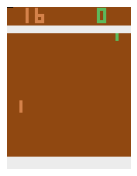

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())